## Problem Statement

### In the following diagram let blue circles indicate positive examples and orange square indicate negative examples. This assignment wants to use k-NN algorithm for classifying the points. If k=3, find the class of the point (6,6). Extend the same example for Distance-Weighted k-NN


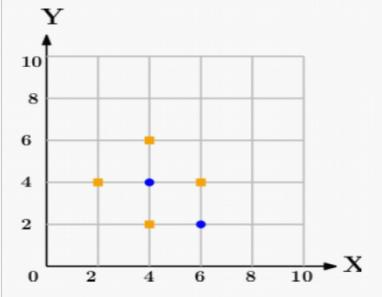

## KNN Key points

* k nearest neighbours

* make prediction based on k number of nearest neighbours

* non parametric

* used for classification and regression

* distance metric - euclidean, manhattan

* lazy learning

* no training period

* Advantages
  1. intuitive algorithm
  2. can be used for classification and regression

* Disadvantages
  1. Time consuming for large dataset
  2. Curse of dimensionality
  3. Sensitive to noisy data, missing values, outliers

* Application
  1. Recommendation Systems

* Choosing the right value of K
  1. Choose odd value of k to avoid ties
  2. k can be taken as square root of N, where N is the number of samples in the dataset
  3. Choose K which gives least error

## Algorithm

1. Load the data

2. k := chosen number of neighbors
3. p := chosen minkowski order
4. collection := empty list

4. For each instance in dataset

 5.1. Calculate the minkowski distance between the query and instance

 5.2. Add the distance and the target of the instance to collection

6. Sort the collection in ascending order by distance
7. Pick the first K entries from the sorted collection
8. Get the target of the selected K entries
9. if knn type is normal then 
  
  9.1 return mode of the targets of K entries

10. if knn type is weighted then

  10.1 return target with the highest weighted sum

## Minkowski Distance
1. For Manhattan Distance, p = 1
2. For Euclidean Distance, p = 2

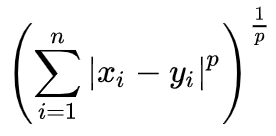

## Weight for Distance weighted KNN

### weight = 1/(distance + c)

## Source Code

In [1]:
from math import sqrt

def knn_classification(dataset,queries,k,distance_type='euclidean'):

  print('knn_classification')

  predictions = []

  # For each query
  for query in queries:

    collection = []

    # For each instance in dataset
    for features, target in dataset:

      # Calculate Distance
      distance = 0
      if distance_type == 'euclidean':
        for instance_feature, query_feature in zip(features,query):
          distance = distance + ((instance_feature-query_feature)**2)
        distance = sqrt(distance)
      elif distance_type == 'manhattan':
        for instance_feature, query_feature in zip(features,query):
          distance = distance + abs(instance_feature-query_feature)

      '''
      # Minkowski Distance
      distance = 0
      p = 2
      if distance == 'manhattan':
        p=1
      elif distance == 'euclidean':
        p=2
      for instance_feature, query_feature in zip(features,query):
        distance = distance + ((instance_feature-query_feature)**p)
      distance = distance**(1/p)
      '''

      # Add Target and Distance to Collection
      collection.append([target,distance])

    # Sort the collection in ascending order by distance
    collection.sort(key = lambda collection: collection[1])

    # Get the first k entries from the sorted collection
    k_entries = collection[0:k]

    # Get the target values of the k_entries
    k_labels = [target for target,distance in k_entries]

    # Get count of each target
    target2count = {}
    for target,distance in k_entries:
      if target in target2count.keys():
        target2count[target] = target2count[target] + 1
      else:
        target2count[target] = 1

    # Prediction is the mode of k_labels i.e target of highest count
    prediction = -1
    max_count = -1
    for target in target2count:
      if target2count[target] > max_count:
        prediction = target
        max_count = target2count[target]

    predictions.append(prediction)

  return predictions

#############################################################

dataset = [
  ((4,2),1),
  ((2,4),1),
  ((6,4),1),
  ((4,6),1),
  ((6,2),0),
  ((4,4),0)
]

queries = [
  (6,6)
]

k = 3

#############################################################

predictions = knn_classification(k=3,dataset=dataset,queries=queries)
for query, prediction in zip(queries, predictions):
  print('Query = {query}'.format(query=query))
  print('Prediction = {prediction}'.format(prediction=prediction))
  print()

knn_classification
Query = (6, 6)
Prediction = 1



In [2]:
from math import sqrt

def distance_weighted_knn_classification(dataset,queries,k,distance_type='euclidean'):

  print('distance_weighted_knn_classification')

  predictions = []

  # For each query
  for query in queries:

    collection = []

    # For each instance in dataset
    for features, target in dataset:

      # Calculate Distance
      distance = 0
      if distance_type == 'euclidean':
        for instance_feature, query_feature in zip(features,query):
          distance = distance + ((instance_feature-query_feature)**2)
        distance = sqrt(distance)
      elif distance_type == 'manhattan':
        for instance_feature, query_feature in zip(features,query):
          distance = distance + abs(instance_feature-query_feature)

      # Add Target and Distance to Collection
      collection.append([target,distance])

    # Sort the collection in ascending order by distance
    collection.sort(key = lambda collection: collection[1])

    # Get the first k entries from the sorted collection
    k_entries = collection[0:k]

    # compute weighted Sum of each target
    target2weight = {}
    c = 0.0001
    for target,distance in k_entries:
      weight = 1/(distance + c)
      if target in target2weight.keys():
        target2weight[target] = target2weight[target] + weight
      else:
        target2weight[target] = weight

    # Prediction is the target value with maximum weighted sum
    prediction = -1
    max_weighted_sum = -1
    for target in target2weight:
      if target2weight[target] > max_weighted_sum:
        prediction = target
        max_weighted_sum = target2weight[target]

    predictions.append(prediction)

  return predictions

#############################################################

dataset = [
  ((4,2),1),
  ((2,4),1),
  ((6,4),1),
  ((4,6),1),
  ((6,2),0),
  ((4,4),0)
]

queries = [
  (6,6)
]

k = 3

#############################################################

predictions = distance_weighted_knn_classification(k=3,dataset=dataset,queries=queries)
for query, prediction in zip(queries, predictions):
  print('Query = {query}'.format(query=query))
  print('Prediction = {prediction}'.format(prediction=prediction))
  print()

distance_weighted_knn_classification
Query = (6, 6)
Prediction = 1



In [3]:
#############################################################

dataset = [
  ((4,2),1),
  ((2,4),1),
  ((6,4),1),
  ((4,6),1),
  ((6,2),0),
  ((4,4),0)
]

queries = [
  (6,6)
]

k = 3

#############################################################

predictions = knn_classification(k=3,dataset=dataset,queries=queries)
for query, prediction in zip(queries, predictions):
  print('Query = {query}'.format(query=query))
  print('Prediction = {prediction}'.format(prediction=prediction))
  print()

knn_classification
Query = (6, 6)
Prediction = 1



In [4]:
predictions = knn_classification(k=3,dataset=dataset,queries=queries)
for query, prediction in zip(queries, predictions):
  print('Query = {query}'.format(query=query))
  print('Prediction = {prediction}'.format(prediction=prediction))
  print()

knn_classification
Query = (6, 6)
Prediction = 1



In [5]:
predictions = distance_weighted_knn_classification(k=3,dataset=dataset,queries=queries)
for query, prediction in zip(queries, predictions):
  print('Query = {query}'.format(query=query))
  print('Prediction = {prediction}'.format(prediction=prediction))
  print()

distance_weighted_knn_classification
Query = (6, 6)
Prediction = 1

